In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

     |████████████████████████████████| 6.3MB 2.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=cafa70ca11f2e5fed770c5da24148fb5c5caf2482a3a5e032144695d197d809d
  Stored in directory: /tmp/pip-ephem-wheel-cache-5_4jqbwn/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-mlynlwei
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-mlynlwei
     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp37-none-any.whl size=75776 sha256=9c13710c166bd5880939ed2419f52776f22511e55d65032bcd5b4f26b3cd394b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ejl4rp1v/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
  Created wheel for empyrical: filename=empyrical-0.5.5-cp37-none-any.whl size=39780 sha256=8f6223e3a90fd120b4496a6ddb9be48ea7b6aa7fd2878255d812fab56553a8d5
  Stored in directory: /root/.cache/pip/wheels/ea/b2/c8/6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc
Successfully built pyfolio empyrical


In [4]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


 ## Obtendo e tratando os dados

In [6]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "BBDC4.SA ITSA4.SA BBAS3.SA SANB4.SA ABCB4.SA IRBR3.SA BBSE3.SA SAPR4.SA LEVE3.SA JHSF3.SA FLRY3.SA EGIE3.SA TAEE3.SA TRPL4.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']


[*********************100%***********************]  15 of 15 completed


In [ ]:
dados_yahoo

In [ ]:
retorno = dados_yahoo.pct_change()
retorno

In [9]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABCB4.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,EGIE3.SA,FLRY3.SA,IRBR3.SA,ITSA4.SA,JHSF3.SA,LEVE3.SA,SANB4.SA,SAPR4.SA,TAEE3.SA,TRPL4.SA,^BVSP
Date,,,,,,,,,,,,,,,
2016-06-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-06-08,1.015561,1.031324,1.031353,1.014131,1.023023,1.003670,NaN,1.017615,1.081081,1.027005,1.008974,1.006593,1.000000,1.010879,1.022599
2016-06-09,1.020475,1.028369,1.033003,1.028263,1.015256,0.999633,NaN,1.024390,1.054054,1.051555,1.019231,1.041759,1.000000,1.007866,1.012478
2016-06-10,0.992629,0.978132,0.991749,0.994793,0.999722,0.988991,NaN,0.970190,1.054054,1.011047,0.989744,1.021978,1.000000,1.000837,0.978886
2016-06-13,0.996724,0.986407,1.008251,0.994793,1.011928,0.987156,NaN,0.979675,1.108108,1.012684,0.975641,1.024176,1.000000,0.998326,0.983620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,2.030161,2.505579,2.140414,1.281276,1.985057,2.409831,0.713154,2.176935,7.875869,1.436109,3.666302,3.651059,2.011483,2.824099,2.499921
2021-06-01,2.034869,2.542238,2.188912,1.319058,2.009502,2.441695,0.717956,2.263290,7.979226,1.566759,3.803296,3.669045,2.050405,2.890635,2.540544
2021-06-02,2.018392,2.633514,2.274571,1.319605,2.017484,2.426219,0.726360,2.337595,8.206614,1.619852,3.883780,3.723001,2.053518,2.838884,2.566966


In [10]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABCB4.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,EGIE3.SA,saldo,retorno
Date,,,,,,,
2016-06-07,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2016-06-08,10155.609592,10313.240054,10313.529565,10141.314569,10230.234734,51153.928513,0.023079
2016-06-09,10204.749818,10283.687665,10330.030755,10282.631227,10152.563970,51253.663435,0.001950
2016-06-10,9926.289662,9781.324879,9917.490961,9947.933660,9997.224345,49570.263507,-0.032844
2016-06-13,9967.242094,9864.067145,10082.509039,9947.933660,10119.277043,49981.028981,0.008287
...,...,...,...,...,...,...,...
2021-05-31,20301.613820,25055.788081,21404.135534,12812.763574,19850.567563,99424.868573,0.002030
2021-06-01,20348.691104,25422.383543,21889.122891,13190.576132,20095.019322,100945.792991,0.015297
2021-06-02,20183.922856,26335.136320,22745.706786,13196.051798,20174.840576,102635.658336,0.016740


## Resultados

Start date,2016-06-07
End date,2021-06-07
Total months,59
,Backtest
Annual return,16.221%
Cumulative returns,110.158%
Annual volatility,29.013%
Sharpe ratio,0.67
Calmar ratio,0.35
Stability,0.55
Max drawdown,-46.172%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,46.17,2020-01-03,2020-03-23,NaT,NaN
1,28.77,2018-02-26,2018-06-18,2018-11-16,190
2,16.06,2017-05-16,2017-06-23,2017-09-11,85
3,15.73,2016-10-31,2016-12-14,2017-01-26,64
4,13.22,2019-07-10,2019-10-08,2019-12-18,116


Stress Events,mean,min,max
New Normal,0.08%,-13.29%,12.21%


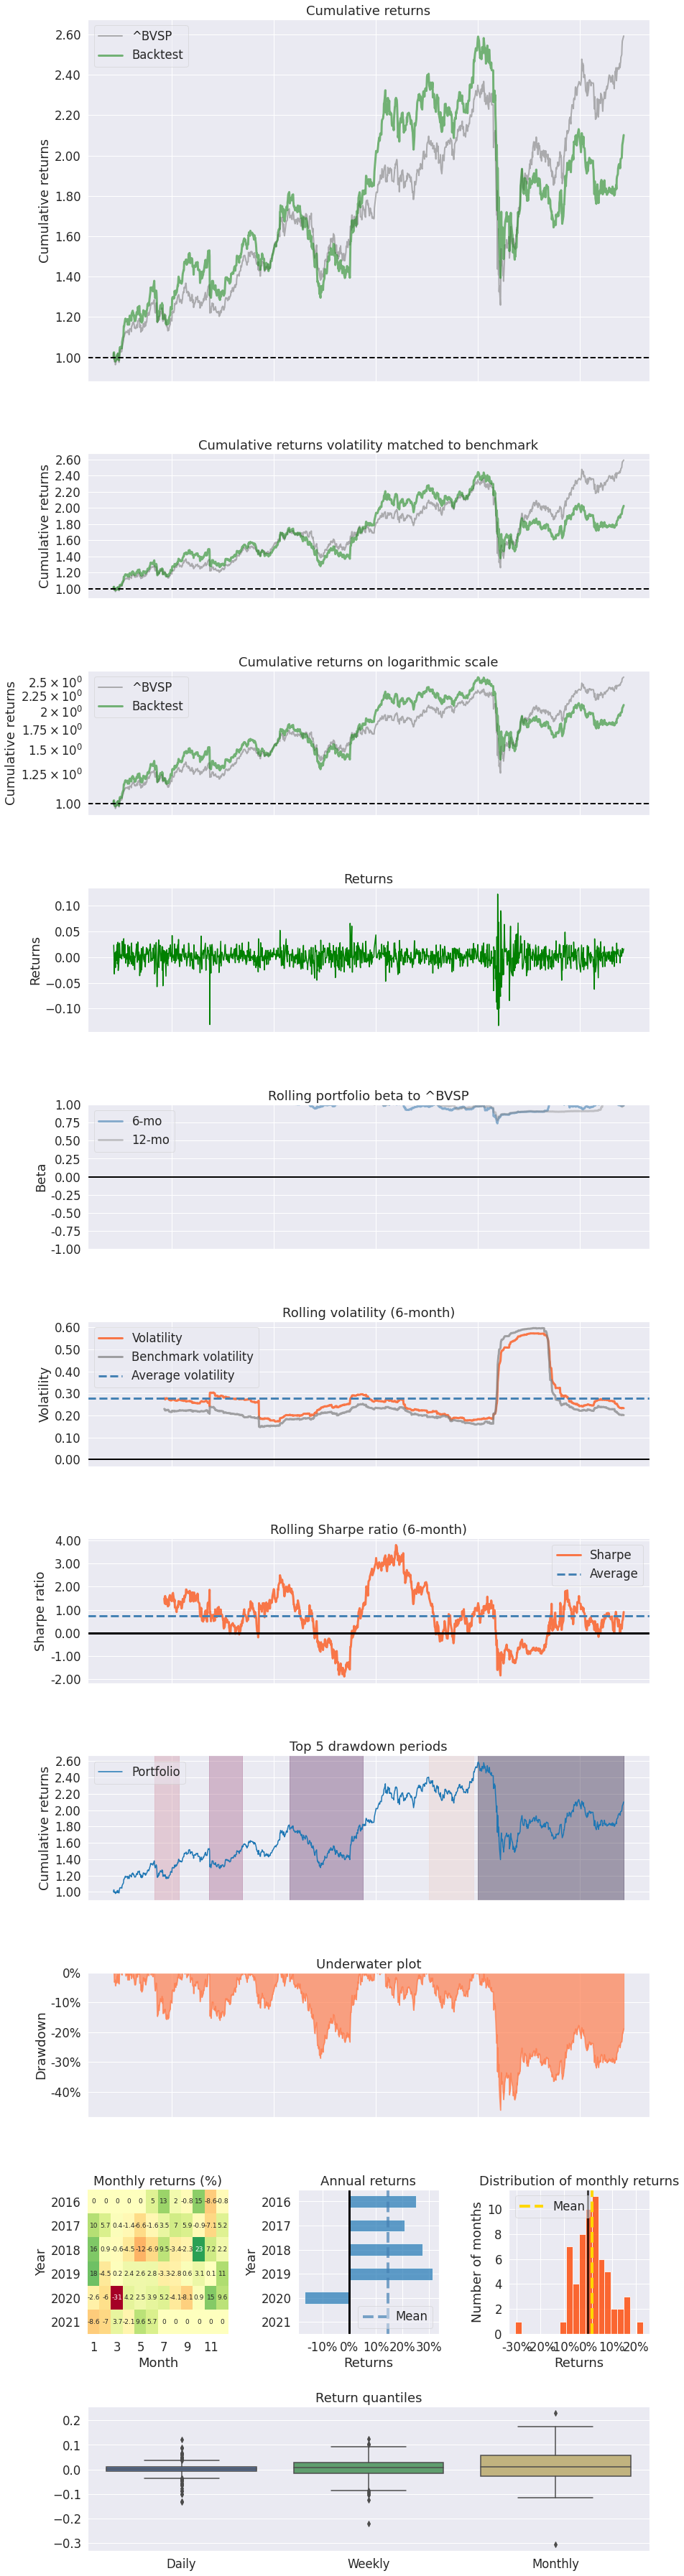

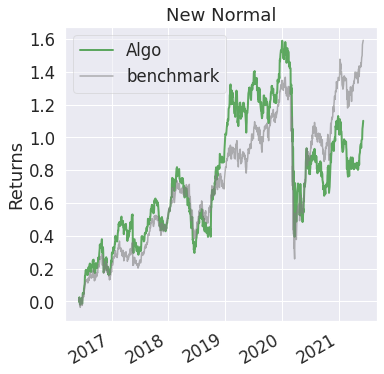

In [11]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

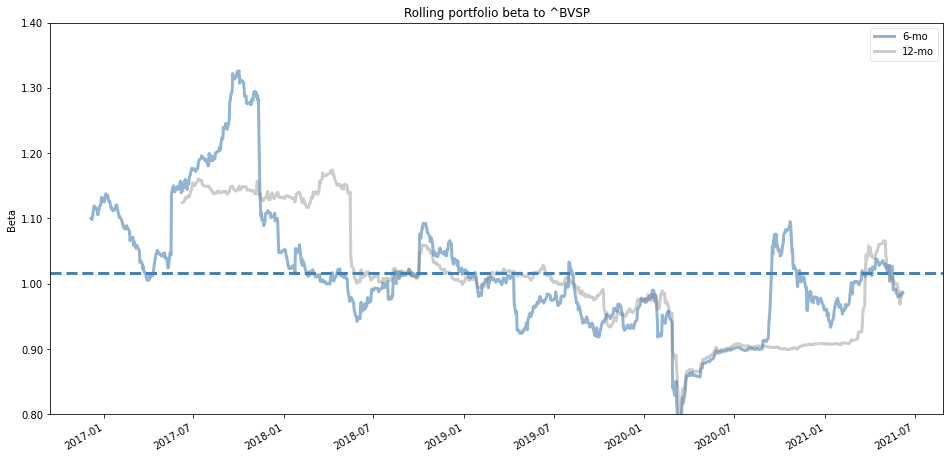

In [12]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));